#Import Statements

In [ ]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt


In [ ]:
import shutil
shutil.unpack_archive('/home/calibraint/Work/self/Deeplearning/WORDEMBEDDING/glove.840B.300d.zip', 'glove.6B')


#Dataset

In [ ]:
toxic_comments = pd.read_csv("/home/calibraint/Work/self/Deeplearning/DATASET/jigsaw-toxic-comment-classification-challenge/test.csv")


In [ ]:
print(toxic_comments.shape)

toxic_comments.head()


(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
toxic_comments.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
filter = toxic_comments["comment_text"] != ""
print(filter)


0         True
1         True
2         True
3         True
4         True
          ... 
159566    True
159567    True
159568    True
159569    True
159570    True
Name: comment_text, Length: 159571, dtype: bool


In [ ]:
np.where(np.array(filter) == False)

(array([], dtype=int64),)

In [ ]:
toxic_comments = toxic_comments[filter]
toxic_comments.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
toxic_comments = toxic_comments.dropna()

In [ ]:
print(toxic_comments.shape)


(159571, 8)


In [ ]:
toxic_comments_labels = toxic_comments[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
toxic_comments_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
toxic_comments_labels.sum(axis=0)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

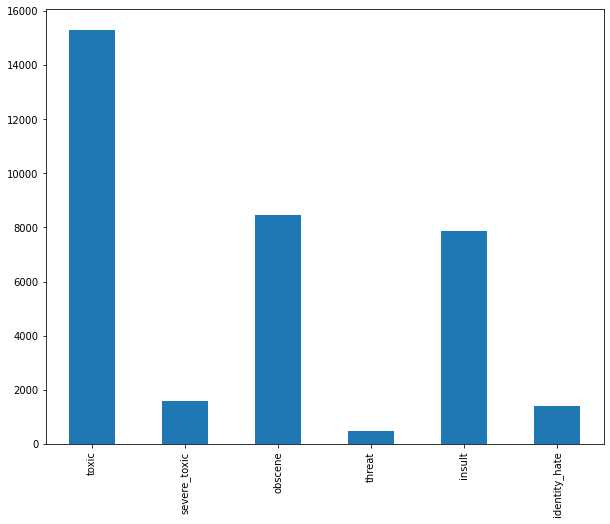

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()


In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    #sentence = sentence.lower()
    return sentence

In [ ]:
X = []
sentences = list(toxic_comments["comment_text"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = toxic_comments_labels.values

In [ ]:
print(X[0])

Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren vandalisms just closure on some GAs after voted at New York Dolls FAC And please don remove the template from the talk page since m retired now 


In [ ]:
print(y)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B/glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
# deep_inputs = Input(shape=(maxlen,))
# embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)



In [62]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False, input_length=maxlen))
model.add( LSTM(128) )
model.add(Dense(6, activation='sigmoid'))

In [63]:
# input_1 = Input(shape=(maxlen,))
# embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
# LSTM_Layer1 = LSTM(128)(embedding_layer)

# output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
# output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
# output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
# output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
# output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
# output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)

# model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6])


In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [65]:
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          14824300  
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 14,942,322
Trainable params: 118,022
Non-trainable params: 14,824,300
_________________________________________________________________
None


In [66]:
history = model.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)

Epoch 1/2
798/798 [==============================] - 567s 708ms/step - loss: 0.1412 - acc: 0.9915 - val_loss: 0.0953 - val_acc: 0.9928
Epoch 2/2
798/798 [==============================] - 564s 707ms/step - loss: 0.0683 - acc: 0.9937 - val_loss: 0.0605 - val_acc: 0.9941


In [67]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test loss:", score[0])
print("Test Accuracy:", score[1])


998/998 [==============================] - 65s 65ms/step - loss: 0.0594 - acc: 0.9941
Test loss: 0.05937588959932327
Test Accuracy: 0.9940780401229858


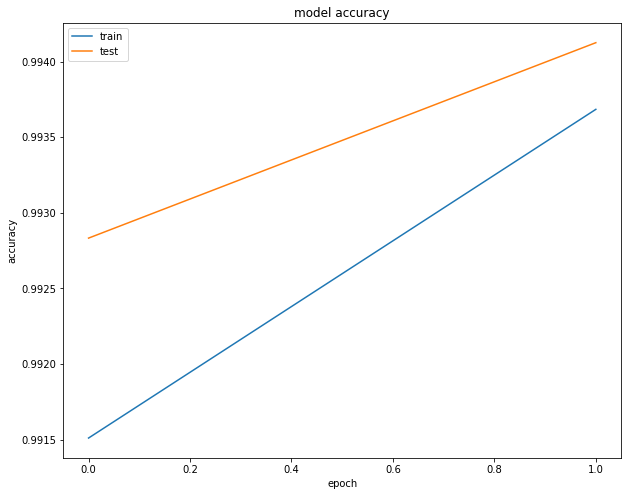

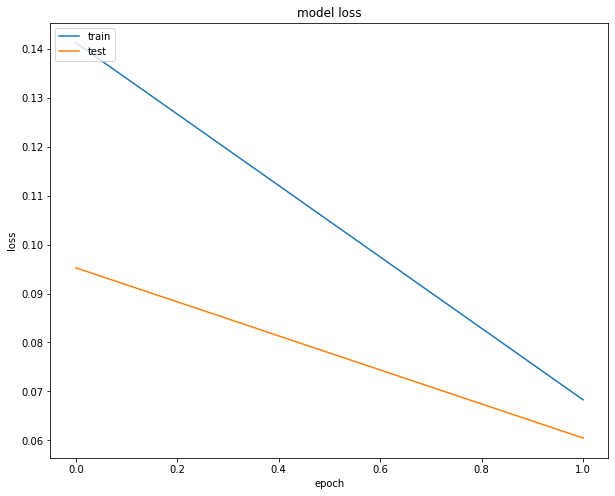

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [69]:
X[4]

'You sir are my hero Any chance you remember what page that on '

In [70]:
test = preprocess_text(X[4])

In [71]:
test 

'You sir are my hero Any chance you remember what page that on '

In [72]:
test = tokenizer.texts_to_sequences([test])
test

[[5, 1612, 17, 27, 3303, 53, 1011, 5, 555, 38, 26, 7, 13]]

In [73]:
test = pad_sequences(test, padding='post', maxlen=maxlen)
test

array([[   5, 1612,   17,   27, 3303,   53, 1011,    5,  555,   38,   26,
           7,   13,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [74]:
model.predict(test)

array([[0.09782562, 0.00206622, 0.03060305, 0.00339729, 0.03683034,
        0.00816557]], dtype=float32)

In [75]:
def test_process(text):
  text = preprocess_text(text)
  text = tokenizer.texts_to_sequences([text])
  text = pad_sequences(text, padding='post', maxlen=maxlen)
  return text

In [76]:
print(X[6],y[6])

COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK [1 1 1 0 1 0]


In [77]:
print(X[12],y[12])

Hey what is it talk What is it an exclusive group of some WP TALIBANS who are good at destroying self appointed purist who GANG UP any one who asks them questions abt their ANTI SOCIAL and DESTRUCTIVE non contribution at WP Ask Sityush to clean up his behavior than issue me nonsensical warnings  [1 0 0 0 0 0]


In [78]:
model.predict(test_process(X[6]))

array([[0.90836024, 0.13695276, 0.78229856, 0.04227254, 0.6220518 ,
        0.11583638]], dtype=float32)

In [79]:
model.predict(test_process(X[12]))

array([[0.0268802 , 0.00054798, 0.0088335 , 0.0012114 , 0.01008931,
        0.00295776]], dtype=float32)